In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-10-25 11:59:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.02s   

2020-10-25 11:59:56 (1.86 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [3]:
#variable-target => custcat
df = pd.read_csv('clean_df.csv')
df.head()

,Title,Type,Start airing,Studios,Genres,Rating,Score,Scored by,Members,Favorites,Niveau,Movie,Music,ONA,OVA,Special,TV
0,Fullmetal Alchemist: Brotherhood,TV,2009,Bones,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387,Excellent,0,0,0,0,0,1
1,Kimi no Na wa.,Movie,2016,CoMix Wave Films,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936,Excellent,1,0,0,0,0,0
2,Gintama°,TV,2015,Bandai Namco Pictures,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597,Excellent,0,0,0,0,0,1
3,Steins;Gate 0,TV,2018,White Fox,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117,Excellent,0,0,0,0,0,1
4,Steins;Gate,TV,2011,White Fox,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365,Excellent,0,0,0,0,0,1


In [4]:
df['Niveau'].value_counts()

Mediocre     1084
Bon           371
Excellent      50
Name: Niveau, dtype: int64

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

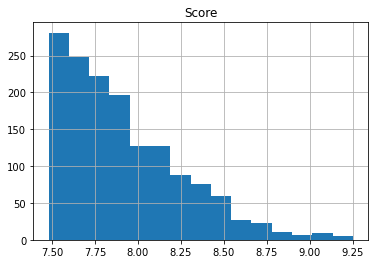

In [5]:
df.hist(column='Score', bins=15)

In [6]:
df.columns

Index(['Title', 'Type', 'Start airing', 'Studios', 'Genres', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Niveau', 'Movie', 'Music', 'ONA',
       'OVA', 'Special', 'TV'],
      dtype='object')

In [7]:
X = df[['Favorites', 'Members','Scored by']] .values

X[0:5]

array([[ 105387, 1176368,  719706],
       [  33936,  705186,  454969],
       [   5597,  194359,   70279],
       [   1117,  186331,   12609],
       [  90365,  990419,  552791]])

In [8]:
#changement de la variable Niveau pour avoir des classes numérotées
group_names = ['1', '2', '3']
bins = np.linspace(min(df["Score"]), max(df["Score"]), 4)
df['Niveau'] = pd.cut(df['Score'], bins, labels=group_names, include_lowest=True )
df['Niveau'] = df['Niveau'].astype("int64")
y = df['Niveau'].values
y[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
#centrage-réduction des données
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[13.76433743,  6.26156814,  6.4973988 ],
       [ 4.21516879,  3.47032066,  3.87946629],
       [ 0.42776357,  0.44421911,  0.07534199],
       [-0.17097228,  0.39666183, -0.49494538],
       [11.75670127,  5.16001995,  4.84680895]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1204, 3) (1204,)
Test set: (301, 3) (301,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
k = 9
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [13]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 1])

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7799003322259136
Test set Accuracy:  0.760797342192691


In [15]:
#Test pour déterminer le K avec le meilleur taux de prédiction
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71760797, 0.73089701, 0.72093023, 0.75415282, 0.73754153,
       0.75083056, 0.75083056, 0.75747508, 0.76079734, 0.75747508,
       0.74750831, 0.76079734, 0.75083056, 0.75747508, 0.75415282,
       0.75415282, 0.74086379, 0.75083056, 0.75083056])

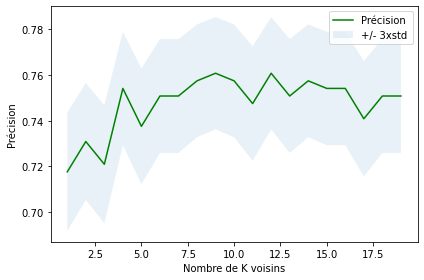

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Précision ', '+/- 3xstd'))
plt.ylabel('Précision')
plt.xlabel('Nombre de K voisins')
plt.tight_layout()
plt.show()

In [17]:
print( "La meilleure précision était de", mean_acc.max()*100, "% avec k=", mean_acc.argmax()+1)

La meilleure précision était de 76.0797342192691 % avec k= 9


In [18]:
#Observation de la matrice de confusion pour interpréter nos prédictions
from sklearn.metrics import confusion_matrix
matrice_de_confusion = confusion_matrix(y_test, yhat)
matrice_de_confusion

array([[203,   9,   0],
       [ 56,  22,   0],
       [  2,   8,   1]])